# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.6707226780225686
3.8807761552310462 -0.6736847285653482
3.8847769553910783 -0.6766359958539782
3.8887777555511103 -0.6795764326493511
3.8927785557111423 -0.6825059918857165
3.8967793558711743 -0.6854246266714343
3.9007801560312063 -0.6883322902897256
3.9047809561912383 -0.6912289361994198
3.9087817563512703 -0.6941145180357001
3.9127825565113024 -0.6969889896108455
3.9167833566713344 -0.6998523049149701
3.9207841568313664 -0.7027044181167592
3.9247849569913984 -0.7055452835642037
3.9287857571514304 -0.70837485578533
3.9327865573114624 -0.7111930894889282
3.9367873574714944 -0.7139999395652773
3.9407881576315265 -0.7167953610868667
3.9447889577915585 -0.7195793093091156
3.9487897579515905 -0.7223517396710895
3.9527905581116225 -0.7251126077962124
3.9567913582716545 -0.727861869492979
3.9607921584316865 -0.73059948075566
3.9647929585917185 -0.7333253977650076
3.9687937587517506 -0.7360395768889568
3.9727945589117826 -0.7387419746833238
3.9767953590718146 -0.7414325478925008
3.98079615

7.821564312862573 0.9994746046591212
7.825565113022605 0.9995962778366849
7.829565913182637 0.9997019510958091
7.833566713342669 0.9997916227450473
7.837567513502701 0.999865291349081
7.841568313662733 0.9999229557287426
7.845569113822765 0.999964614961034
7.849569913982797 0.9999902683791416
7.853570714142829 0.9999999155724472
7.857571514302861 0.999993556386534
7.861572314462893 0.9999711909231896
7.865573114622925 0.9999328195404042
7.869573914782957 0.9998784428523647
7.873574714942989 0.999808061729445
7.877575515103021 0.9997216772981923
7.881576315263053 0.9996192909413084
7.885577115423085 0.9995009042976286
7.889577915583117 0.9993665192620944
7.893578715743149 0.9992161379857238
7.897579515903181 0.9990497628755769
7.901580316063213 0.9988673965947168
7.905581116223245 0.9986690420621678
7.909581916383277 0.9984547024528679
7.913582716543309 0.9982243811976187
7.917583516703341 0.9979780819830295
7.921584316863373 0.9977158087514595
7.925585117023405 0.9974375657009539
7.929

-0.7526171377265338
11.718343668733747 -0.7499767610064116
11.722344468893779 -0.7473243798728341
11.72634526905381 -0.7446600367808229
11.730346069213843 -0.7419837743768677
11.734346869373875 -0.739295635498243
11.738347669533907 -0.7365956631723226
11.742348469693939 -0.7338839006158911
11.74634926985397 -0.7311603912344522
11.750350070014003 -0.7284251786215334
11.754350870174035 -0.7256783065579887
11.758351670334067 -0.7229198190112978
11.762352470494099 -0.7201497601348621
11.76635327065413 -0.7173681742672982
11.770354070814163 -0.714575105931728
11.774354870974195 -0.7117705998350665
11.778355671134227 -0.7089547008673053
11.782356471294259 -0.7061274541007951
11.78635727145429 -0.7032889047895236
11.790358071614323 -0.7004390983683911
11.794358871774355 -0.6975780804524842
11.798359671934387 -0.694705896836344
11.802360472094419 -0.6918225934932348
11.80636127225445 -0.6889282165744072
11.810362072414483 -0.6860228124083595
11.814362872574515 -0.6831064275000966
11.8183636727

15.603120624124825 0.10465067798537053
15.607121424284857 0.10067101912418357
15.61112222444489 0.09668974888435211
15.615123024604921 0.09270693099160278
15.619123824764953 0.0887226291964345
15.623124624924985 0.08473690727309814
15.627125425085017 0.08074982901857562
15.63112622524505 0.07676145825155886
15.635127025405081 0.07277185881142821
15.639127825565113 0.06878109455723064
15.643128625725145 0.06478922936665754
15.647129425885177 0.06079632713502236
15.65113022604521 0.05680245177423779
15.655131026205241 0.05280766721179281
15.659131826365273 0.04881203738972941
15.663132626525305 0.04481562626361916
15.667133426685337 0.040818497801539434
15.67113422684537 0.036820715983049604
15.675135027005402 0.03282234479816688
15.679135827165434 0.02882344824634212
15.683136627325466 0.024824090335435377
15.687137427485498 0.020824335080691425
15.69113822764553 0.01682424650371505
15.695139027805562 0.01282388863144633
15.699139827965594 0.008823325495135786
15.703140628125626 0.00482

0.5632663973711134
19.451890378075614 0.5665676432046003
19.455891178235646 0.5698598203407713
19.459891978395678 0.5731428760837864
19.46389277855571 0.5764167578838059
19.467893578715742 0.5796814133378315
19.471894378875774 0.582936790190546
19.475895179035806 0.5861828363351483
19.479895979195838 0.5894194998141886
19.48389677935587 0.5926467288203994
19.487897579515902 0.5958644716975251
19.491898379675934 0.5990726769411485
19.495899179835966 0.6022712931995157
19.499899979995998 0.6054602692743575
19.50390078015603 0.6086395541217091
19.507901580316062 0.6118090968527276
19.511902380476094 0.6149688467345055
19.515903180636126 0.6181187531908838
19.51990398079616 0.621258765803261
19.52390478095619 0.6243888343114002
19.527905581116222 0.6275089086142338
19.531906381276254 0.6306189387706649
19.535907181436286 0.6337188750003673
19.53990798159632 0.636808667684582
19.54390878175635 0.6398882673669114
19.547909581916382 0.642957624754111
19.551910382076414 0.6460166907168783
19.5

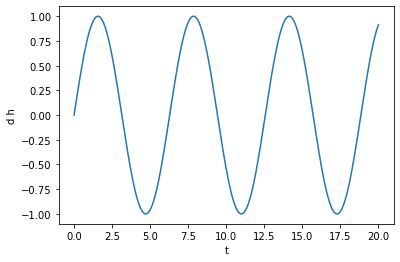

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

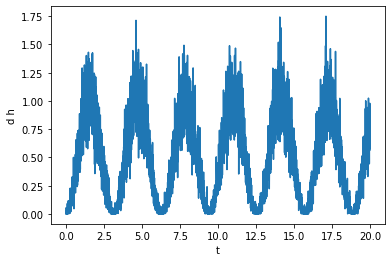

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

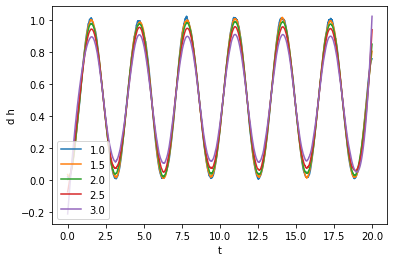

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

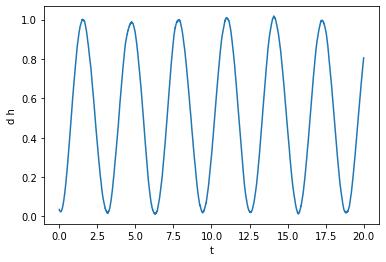

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1842


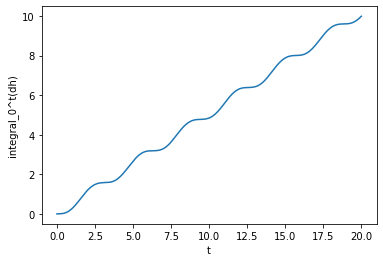

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

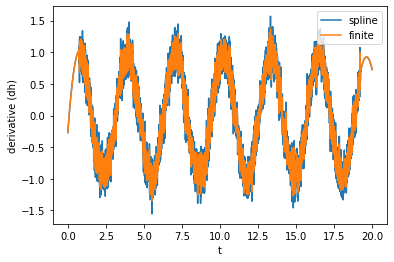

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

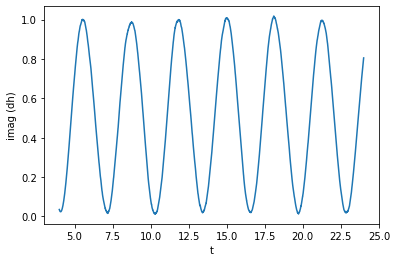

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

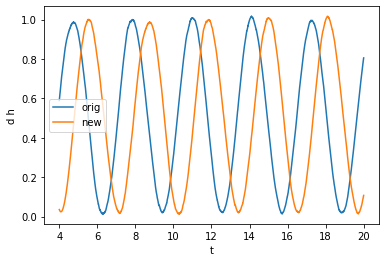

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

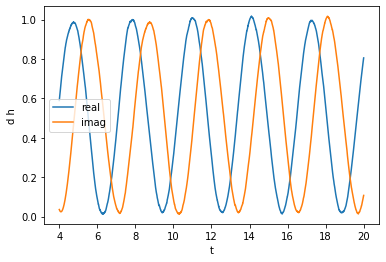

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

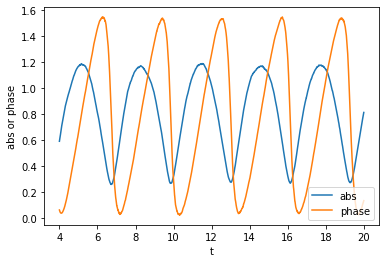

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

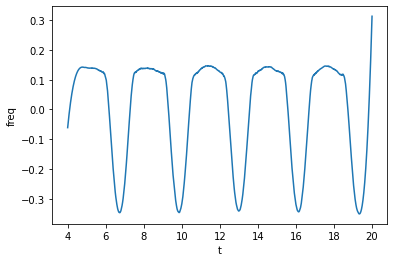

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

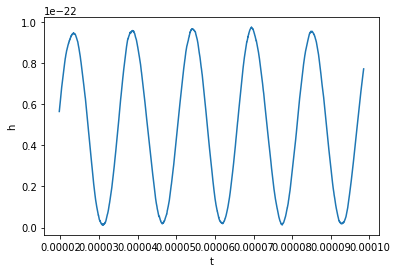

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

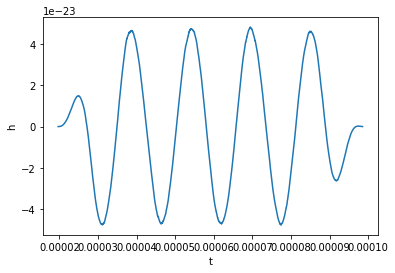

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

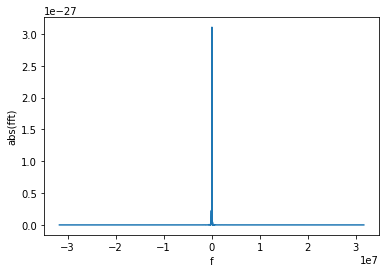

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

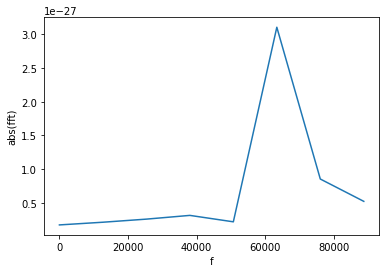

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64215.86


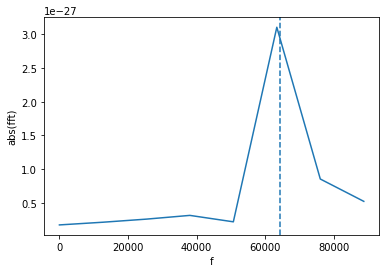

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.104e-27
Maximum with mask 8.541e-28
Length with mask 8
Length after having removed the masked points 7
